# INM702 - regression - task2

This is the notebook backing up our work for task 2. The Outlier section is first, followed by the multi-collinearity. 

# Outlier
An outlier is an observation that lies outside the overall pattern of a distribution (Moore and McCabe 1999). It can be found by residual plots and scatter plot of X, y points.

Solving environment: done

# All requested packages already installed.



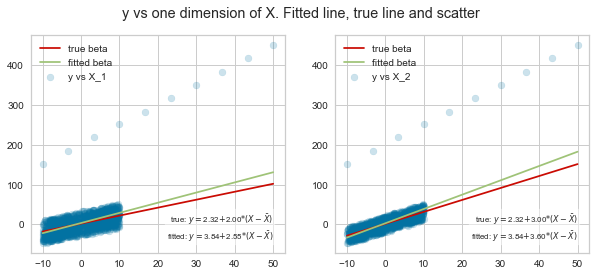

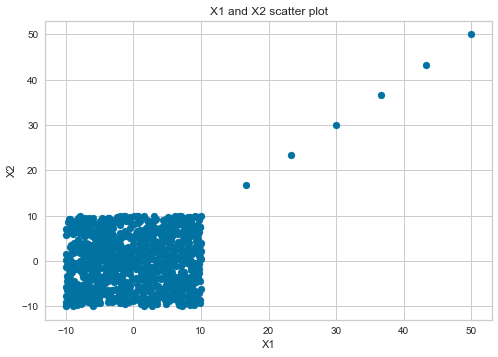

Fig. 1 Scatter plots of X vs y  and X1 vs X2


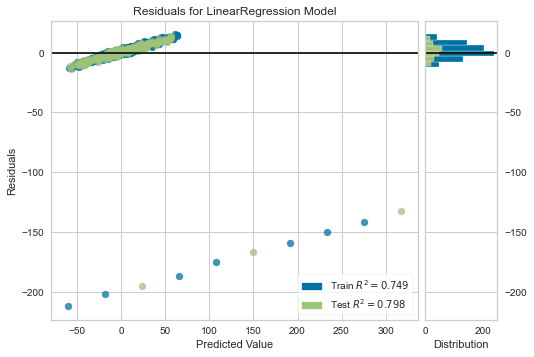

Fig. 2 Residual Plot


In [6]:
# This is a kind of hack to put the /src folder into the python path. see:
# https://stackoverflow.com/questions/61234609/how-to-import-python-package-from-another-directory
import sys
sys.path.insert(0, '../src')
!conda install --yes --prefix {sys.prefix} yellowbrick

#adapted from our work Outlier_analysis.py

from regression import GenerateData, UniformX #our work
from Outlier import Outlier, Outlier_position #our work
from simulation import print_coef, simulation, change_factor #our work
import numpy as np
from numpy.random import default_rng

import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#need prior installation in terminal: 
#"conda install -c districtdatalabs yellowbrick" 
#then "conda install -c conda-forge yellowbrick"
from yellowbrick.regressor import ResidualsPlot 


#set original dataset X, y
set1=UniformX(N=1000, beta=(1, 2, 3), noise_var=1, random_seed=42)
set1.generate_dataset()
X=set1.X
y=set1.y

#outlier specification
outlier_number = 10
outlier_magnitude = 200
positions=Outlier_position(start_position=[-10,-10], end_position=[50,50], N=outlier_number)

#how to detect outliers


#initialize for object of GenerateData sub class Outlier
demo1=Outlier(random_seed=42)

#generate outliers to X, y for demo1
demo1.generate_dataset(magnitude=outlier_magnitude, original_X=X, original_y=y, original_beta=set1.beta, positions=positions)

demo1.fit()

#scatterplot of X, y
demo1.plot2D()
plt.show()

#scatterplot of X1, X2
plt.scatter(demo1.X[:,0],demo1.X[:,1])
plt.title("X1 and X2 scatter plot")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
print("Fig. 1 Scatter plots of X vs y  and X1 vs X2")


#initialize for object of GenerateData sub class Outlier
demo2=Outlier(random_seed=42)
#generate outliers to X, y for demo2
demo2.generate_dataset(magnitude=outlier_magnitude, original_X=X, original_y=y, original_beta=set1.beta, positions=positions)

#residual plot - library reference: https://www.scikit-yb.org/en/latest/api/regressor/residuals.html
X_train, X_test, y_train, y_test = train_test_split(demo2.X, demo2.y, test_size=0.2, random_state=42) # split the train and test data
model = LinearRegression() # Instantiate the linear model and visualizer
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure
print("Fig. 2 Residual Plot")



## Detection of outliers
Fig. 1 scatter plot of X and y visualizes outliers in the top, while scatter plot of X1 and X2 have some outliers hidden in the normal range of feature space.
In Fig. 2 Residual plots - outliers are found in the far negative area. In the histogram of residual plot, however, the outlier is too small to see as proportion by count is too small compared with 1000 samples. If standardized, residuals beyond +/- 3 may typically be regarded as outliers. Note that if outliers become too influential (say, because sample size not enough), coefficients may be distorted to fit the outlier such that the residuals measured by fitted model may not be obvious for the outlier. Check further by removing a suspected outlier (e.g. in Fig.1) to see if it greatly affects the model and check the accuracy of raw data.

## Impact of outliers
An outlier can affect the linear regression model greatly as the difference is squared for minimization. We will study how outliers affect the intercept, coefficients, residuals and R2 score of the model by using the same true linear model y = 1 + 2X1 + 3X2 + e (where e is random noise variable ~N(0,1)) with 1000 samples X1 , X2 generated from uniform distribution (-10,10). Then add outliers with specified magnitude, number and position. This is repeated 1000 times for calculating the variance and mean of key estimates. Further repeat above by varying the position, magnitude, number of outliers to study the impact.


testing impact of number of outliers


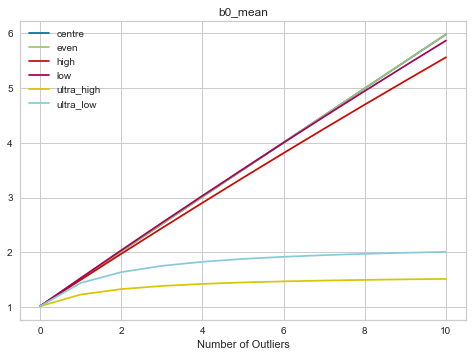

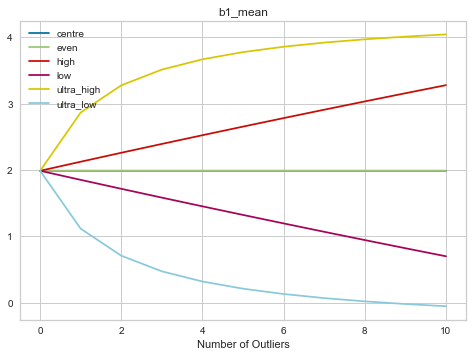

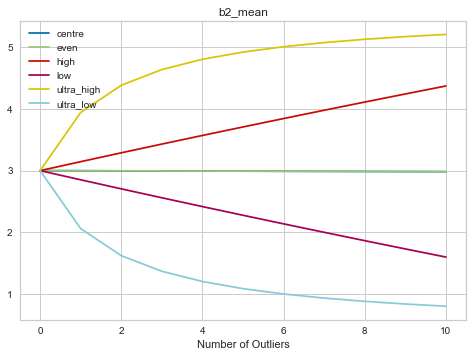

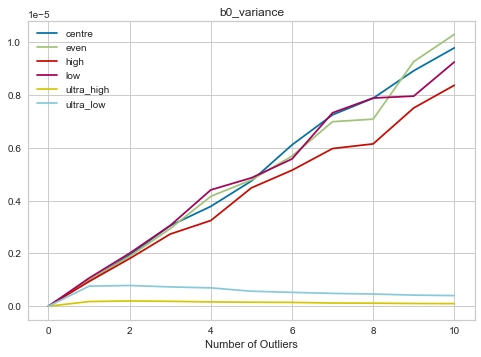

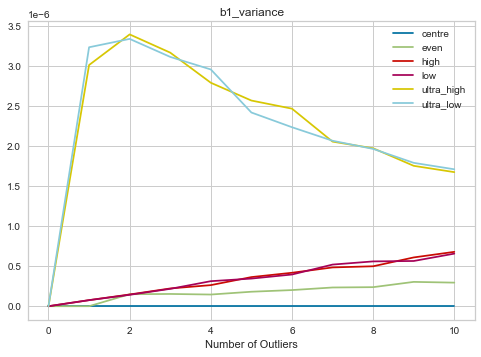

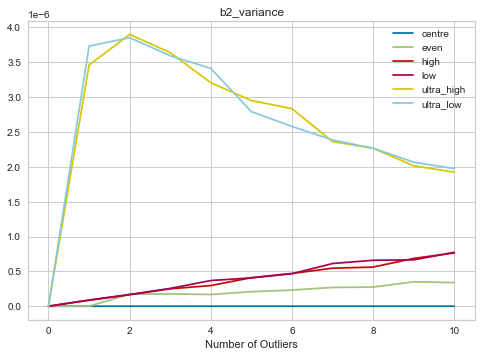

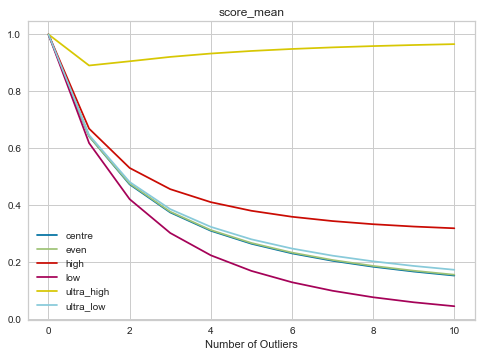

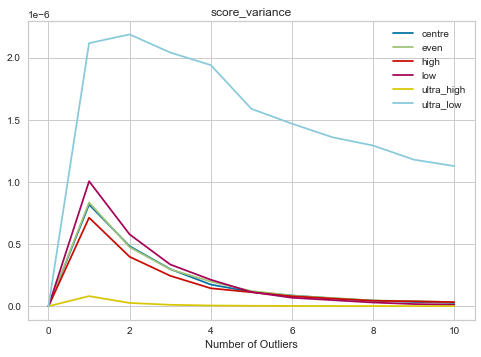

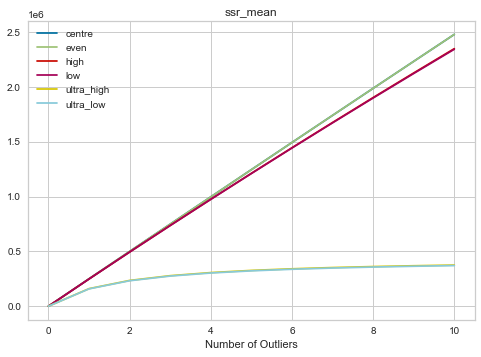

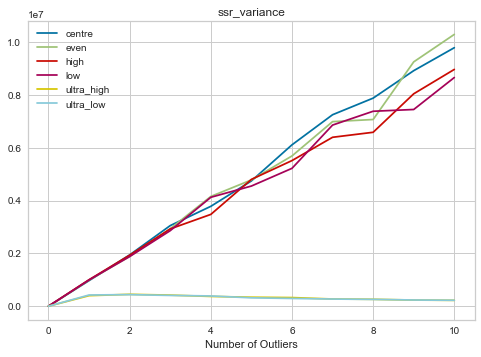

In [3]:
#testing impact

#test1 - test impact of Num of Outliers, 
#assuming i)evenly spread, ii)high end value of input X, iii)low end, iv)centre value of input X

#initialize for object of GenerateData sub class Outlier

test1=Outlier(random_seed=42)
outlier_magnitude = 500

#initialize different scenarios of outlier positions, and set varying number of outliers for each scenario
Number_of_outliers = np.arange(0,11)
p = ['centre', 'even', 'high','low','ultra_high', 'ultra_low']
pos = {k:None for k in p}
num = {k:None for k in p}
pos['centre']=[Outlier_position([0,0],N=i) for i in Number_of_outliers]
pos['even']=[Outlier_position([10,10],[-10,-10],N=i) for i in Number_of_outliers]
pos['high']=[Outlier_position([10,10],N=i) for i in Number_of_outliers]
pos['low']=[Outlier_position([-10,-10],N=i) for i in Number_of_outliers]
pos['ultra_high']=[Outlier_position([100,100],N=i) for i in Number_of_outliers]
pos['ultra_low']=[Outlier_position([-100,-100],N=i) for i in Number_of_outliers]


#create dictionary of dictionary storing results based on varying number of outliers for 4 position scenarios
for position in p:
    num[position] = change_factor(test1, 1000,factor={"positions":pos[position]}, magnitude=outlier_magnitude, original_X=X, original_y=y, original_beta=set1.beta,)

#create chart to show impact on coefficients against number of outliers
print('testing impact of number of outliers')
for estimate_key in ["b0_mean", "b1_mean", "b2_mean", "b0_variance", "b1_variance", "b2_variance","score_mean", "score_variance", "ssr_mean", "ssr_variance"]:
    for position in p:
        plt.plot(Number_of_outliers, num[position][estimate_key], label = position)   
    plt.title(estimate_key)
    plt.xlabel('Number of Outliers')
    plt.legend()
    plt.show()
    

testing impact of magnitude of outliers


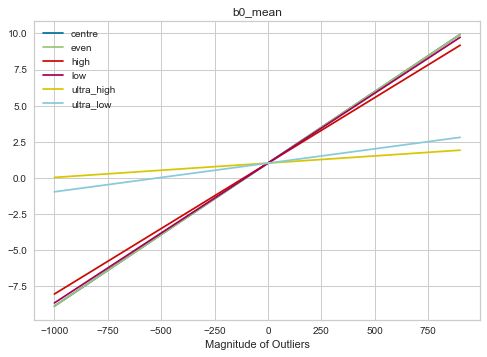

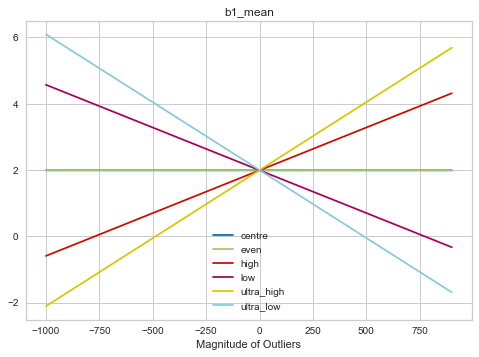

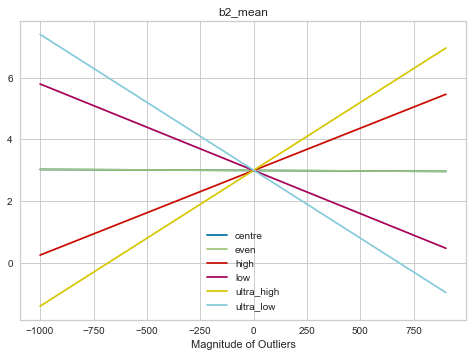

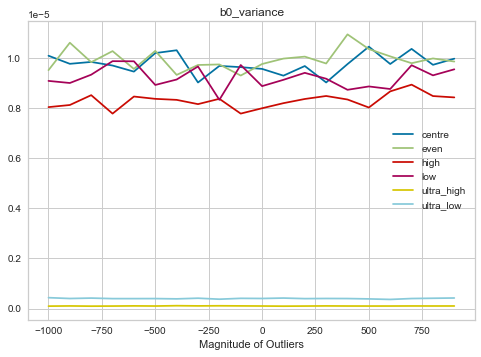

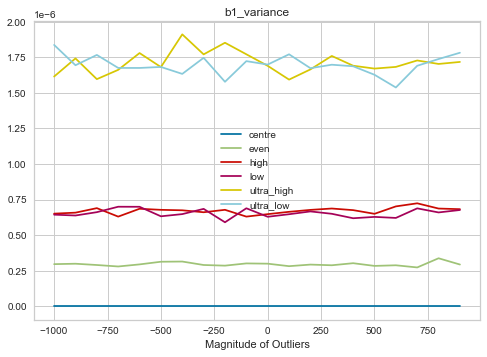

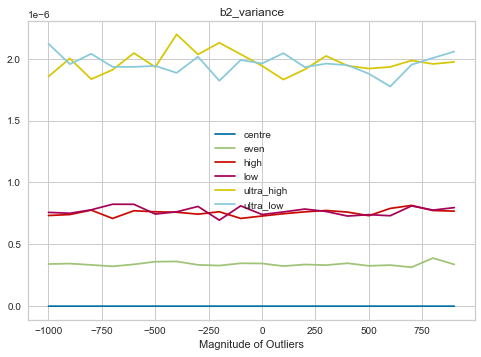

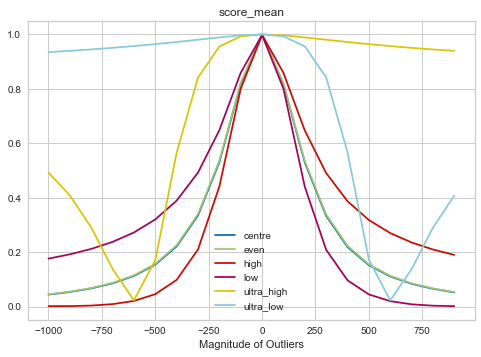

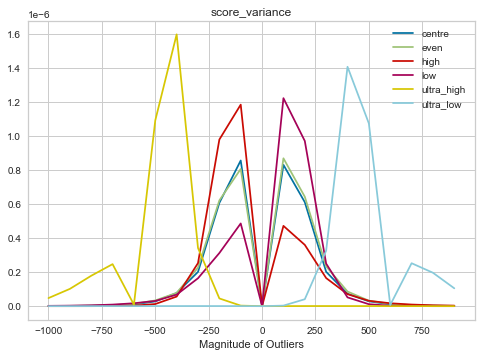

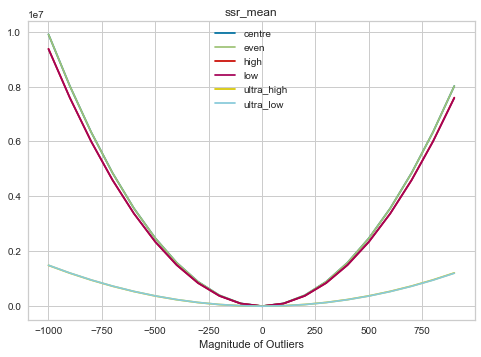

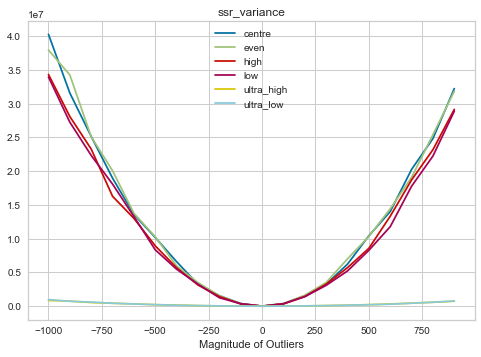

In [4]:
#test2 - test impact of magnitude of Outliers, 
#assuming i)evenly spread, ii)high end value of input X, iii)low end, iv)centre value of input X

#initialize for object of GenerateData sub class Outlier
test2=Outlier(random_seed=42)
outlier_number = 10

#initialize different scenarios of outlier positions, and set varying number of outliers for each scenario
Magnitude_of_outliers = np.arange(-1000,1000, step=100)
pos = {k:None for k in p}
mag = {k:None for k in p}
pos['centre']=Outlier_position([0,0], N=outlier_number) 
pos['even']=Outlier_position([10,10],[-10,-10], N=outlier_number)
pos['high']=Outlier_position([10,10], N=outlier_number)
pos['low']=Outlier_position([-10,-10], N=outlier_number)
pos['ultra_high']=Outlier_position([100,100], N=outlier_number)
pos['ultra_low']=Outlier_position([-100,-100], N=outlier_number)


#create dictionary of dictionary storing results based on varying magnitude of outliers for 4 position scenarios
for position in p:
    mag[position] = change_factor(test2, 1000,factor={"magnitude":Magnitude_of_outliers},positions=pos[position], original_X=X, original_y=y, original_beta=set1.beta,)

#create chart to show impact on coefficients against magnitude of outliers
print('testing impact of magnitude of outliers')
for estimate_key in ["b0_mean", "b1_mean", "b2_mean", "b0_variance", "b1_variance", "b2_variance","score_mean", "score_variance", "ssr_mean", "ssr_variance"]:
    for position in p:
        plt.plot(Magnitude_of_outliers, mag[position][estimate_key], label = position)   
    plt.title(estimate_key)
    plt.xlabel('Magnitude of Outliers')
    plt.legend()
    plt.show()

## Summary of findings from 20 charts above
Position matters a lot - outliers at centre of feature space do not affect b1 at all! Evenly distributed outliers across the feature space may slightly change b1, but the mean of b1 remain the same as the true model and the variance is smaller than if outliers are concentrated all at the high end (or all at the low end) of the feature space. The mean of b1 is in linear relationship with magnitude of unevenly distributed outliers. Number of outliers also have similar relationship except ultra-outliers (we define as those far beyond the normal range of feature space X1 , X2), which can change b1 sharply with just one or two outliers. b1 variance increases with number of outliers but only fluctuates with magnitude, except ultra-outliers, which increases b1 variance sharply for first couple of outliers and then decreases.  
The charts for coefficients b2 show the same properties as b1.

Intercept – its mean increases linearly with magnitude of outliers, regardless of the positions, though ultra-outliers have much less impact. It also increases with number of outliers, except the ultra, which doesn’t change its mean much after the first couple of outliers. Interestingly, while the intercept variance increases with the number of outliers (except ultra, which decreases its variance after the first outlier), it only fluctuates with the magnitude of the outliers.

Residuals can be measured by sum of squares of residuals (ssr). The mean of ssr increases linearly with number of outliers and quadratically with the magnitude for all positions of outliers except for ultra, which increases ssr mean slightly and then almost flattens with more number of outliers. The ssr variance has the same shape as the mean of ssr, though less smoothly and ultra is an exception – it decreases ssr variance after the first one or two outliers.

R2 score = 1 - ssr/Var(Y) , interpreted as proportion of explained variance, is commonly used as one indicator of fitness of the model, though it may need adjustment when compared with models of different number of parameters. Its mean generally decreases with absolute magnitude and number of outliers, which implies that ssr increases more than the total variance. Its variance also have same shape except at the point of zero magnitude or zero number of outliers. The exception is ultra – after the first outlier, the score improves a bit with more outliers. Coefficients are so much influenced to fit ultra-outliers that more ultra-outliers make it more plausible to keep model coefficients which already incline to fitting ultra-outliers. This gives us an alert that we cannot simply detect presence of outliers by R2 score, especially for ultra-ones. And for ultra-high outliers, the mean of score only slightly decreases with higher positive magnitude of outliers.

# Collinearity
### For INM702 - regression

When discussing the regression model, we will use notation from "Applied Regression Analysis", Springer. (XXXX - need to check I use correct citation)

The linear model can be written as

$$\boldsymbol{Y} = \boldsymbol{X\beta} + \boldsymbol{\epsilon}$$

Where 
* $\boldsymbol{Y}$ has size $(N, 1)$, where $N$ is the sample size,
* $\boldsymbol{X}$ is of size $(n, p')$ and has a column of 1s as the first column. There are $p = p'-1$ independent random variables, each sampled $N$ times. 
* $\boldsymbol{\beta}$ is of size $(p', 1)$ and consists of $\beta_0$, the intercept, and $(\beta_1,... ,\beta_p)$, the coefficients corresponding to the random variables.
* $\boldsymbol{\epsilon}$ is the random noise and consists of independent identically distributed normal variables with mean 0. 

$\hat{\boldsymbol{\beta}}$, the estimate of $\boldsymbol{\beta}$ is a random vector and can be written as a linear combination of the observed random dependent variable $\boldsymbol{Y}$

$\hat{\boldsymbol{\beta}} = (\boldsymbol{X}^{\prime}\boldsymbol{X})^{-1}(\boldsymbol{X}^{\prime}\boldsymbol{Y})$

$(\boldsymbol{X}^{\prime}\boldsymbol{X})$ has an inverse if $\boldsymbol{X}$ is of full rank - i.e. has no colinearities. If $\boldsymbol{X}$ has colinearities, then it will be hard to make good estimates of $\boldsymbol{\beta}$.

We investigate the implications of colinearities in the features, and what we can do to mitigate them. 

In [2]:
import sys
sys.path.insert(0, '../src')

from colinearity import ColinearX
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
# from sklearn.linear_model import LinearRegression
import scipy.stats as sps
import seaborn as sns
sns.set(style='ticks')

## Variance inflation factor to identify colinearities

### Example one: generate 3 orthogonal X features and 2 which are linear combinations of X_1 and X_2

We can build synthetic data where we have $\boldsymbol{X}_1, \boldsymbol{X}_2, \boldsymbol{X}_3$ that are orthoganal and then just define $\boldsymbol{X}_4$ and $\boldsymbol{X}_5$ that are linear combinations of $\boldsymbol{X}_1$ and $\boldsymbol{X}_2$ (plus some noise).

Specificaly $\boldsymbol{X}_4$ and $\boldsymbol{X}_5$ are of the form $b_0 + b_1\boldsymbol{X}_1 + b_2\boldsymbol{X}_2 + \boldsymbol{\epsilon}$

If $\boldsymbol{\epsilon}$ is set to zero then the rank of $\boldsymbol{X}$ is 4 and so it is obvious that there is colinearity and that 2 columns of $\boldsymbol{X}$ can be eliminated with no loss of information. If one allows $\boldsymbol{\epsilon}$ to have some variance - which is more realistic - then $\boldsymbol{X}$ will be of full rank and we need to find colinearities in a different way.

Lets test the invariance inflation factor method to see if it identifies colinearities. 

Using all 5 features, we have an $R^2$ of 81% in this case and we also seem to have identified some colinearities in the data given our variance inflation factors.

The code below creates linear regression object with 5 "independent" variables ("features"). Of these, X_3 is truly orthogonal. X_4 and X_5 are a linear combination of X_1 and X_2 with coefficients (0, 1, 2) and (2, 3, -1) respecively.

We print out $R^2$, VIF array, and some plots of individual features against y, with their beta estimates and "true" values of beta printed on the charts.

R-squared of model is 81.37%
Variance inflation factor of features are [102.95278752  47.78270825   1.0299284   49.75596363 100.8212474 ]



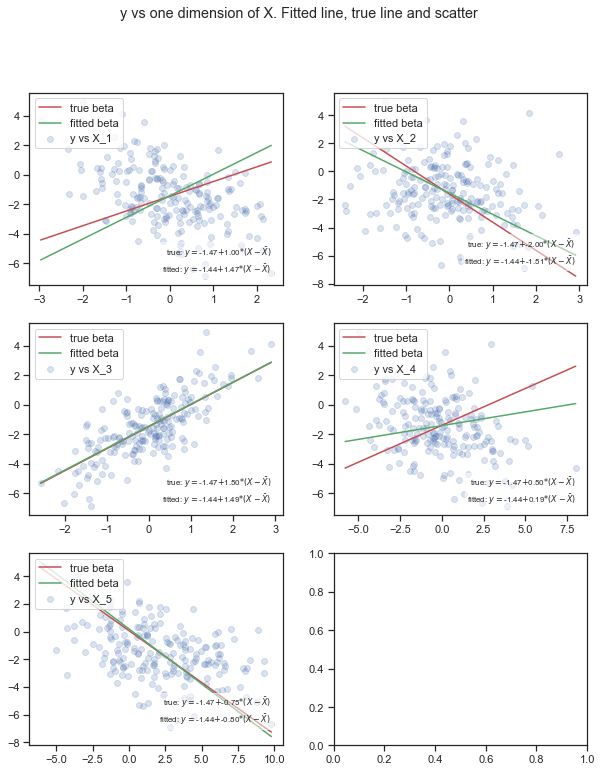

In [3]:
def create_colinear_model():
    test = ColinearX(N=200, beta=(0, 1, -2, 1.5), noise_var=1, random_seed=42)
    test.generate_X(co_type="pairwise correlation", mean=(0, 0, 0), cov=0)
    test.add_linear_combination(i_list=[1, 2], beta=(0, 1, 2), y_beta=0.5, noise_var=0.1)
    test.add_linear_combination(i_list=[1, 2], beta=(2, 3, -1), y_beta=-0.75, noise_var=0.1)
    test.generate_y()
    test.train_test_split()
    test.fit()
    print("R-squared of model is {:.2%}".format(test.score))
    print("Variance inflation factor of features are {}\n".format(test.variance_inflation_factor(test.X)))
    return test
colinear = create_colinear_model()
colinear.plot2D()
# test.plot_residuals()

As expected $X_3$ looks to be orthogonal to the other features. The variance co-factor works!

Now remove the variable with the bigget variance inflation factor and see what happens

In [4]:
# removes X_1 from the model, and fits the model again. 
colinear.remove_Xi(0)
colinear.fit()
print("R-squared of new model is {:.2%}".format(colinear.score))
print("Variance inflation factor of remaining features are {}".format(colinear.variance_inflation_factor(colinear.X)))

R-squared of new model is 81.66%
Variance inflation factor of remaining features are [46.52816559  1.01484866 45.61379288 10.90016053]


Variance inflation factors are reducing in size. Progress! Now remove $X_1$ which has the largest variance inflation factor.

In [5]:
colinear.remove_Xi(0)
colinear.fit()
print("R-squared of new model is {:.2%}".format(colinear.score))
print("Variance inflation factor of remaining features are {}".format(colinear.variance_inflation_factor(colinear.X)))

R-squared of new model is 81.12%
Variance inflation factor of remaining features are [1.0145802  1.04918237 1.06209965]


The VIFs are low now - indicating little colinearity between features.

In this case we actually have a larger $R^2$ - not sure that we should get this, but the overall fit of the model has stayed about the same, and we have fewer features and better explainability.

What happens if we build the same model again, and instead of removing variables, just replace them with the resididuals of a linear combination of the other X?

In [6]:
# build an identical data set to above
colinear2 = create_colinear_model()

R-squared of model is 81.37%
Variance inflation factor of features are [102.95278752  47.78270825   1.0299284   49.75596363 100.8212474 ]



Instead of removing $X_1$ lets convert it to residuals

In [6]:
colinear2 = create_colinear_model()
colinear2.convert_feature_to_residuals(colinear2.X, 0)
colinear2.fit()
print("-"*20)
print("R-squared of new model is {:.2%}".format(colinear2.score))
print("Variance inflation factor of remaining features are {}".format(colinear2.variance_inflation_factor(colinear2.X)))

R-squared of model is 81.37%
Variance inflation factor of features are [102.95278752  47.78270825   1.0299284   49.75596363 100.8212474 ]

--------------------
R-squared of new model is 81.37%
Variance inflation factor of remaining features are [ 1.         46.52816559  1.01484866 45.61379288 10.90016053]


An improvement! Almost by construction the variance inflation factor is 1 for $X_1$. Lets do the same to $X_2$

R-squared of new model is 81.37%
Variance inflation factor of remaining features are [1.         1.         1.0145802  1.04918237 1.06209965]



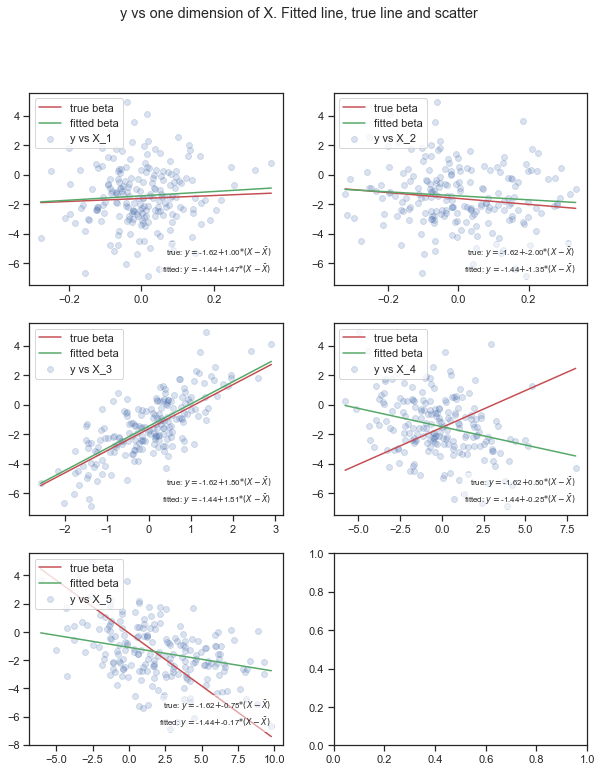

In [7]:
colinear2.convert_feature_to_residuals(colinear2.X, 1)
colinear2.fit()
print("R-squared of new model is {:.2%}".format(colinear2.score))
print("Variance inflation factor of remaining features are {}\n".format(colinear2.variance_inflation_factor(colinear2.X)))
colinear2.plot2D()

There are some big differences between estimated and "true" beta for features $X_4$ and $X_5$ - maybe we didn't do a good job at esimating the coefficients? More on that below.

#### Show the relationship beween the beta of X_3 on X_1 and the variance inflation factor

Below we have a model where $X_4$ is a linear combination $X_4 = X_1 + bX_2 + \epsilon$. To see the impact of $b$ on the variance inflation factor, we very beta from -5 to 5 and plot the variance inflation factors.

The magnitude gets much higher than for correlated features. This is probably because when $b$ is high relative to $\epsilon$, then the correlation of the features tends to 1.

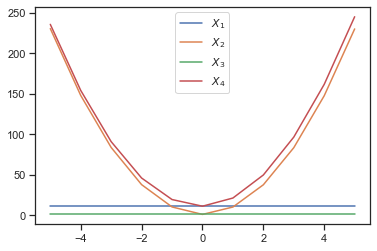

In [7]:
def vary_X2_beta(beta2):
    test = ColinearX(N=200, beta=(0, 1, -1, 1), noise_var=1, random_seed=42)
    test.generate_X(co_type="pairwise correlation", mean=(0, 0, 0), cov=0)
    test.add_linear_combination(i_list=[1, 2], beta=(0, 1, beta2), y_beta=0, noise_var=0.1)
    test.generate_y()
    test.train_test_split()
    test.fit()
    return test.variance_inflation_factor(test.X).reshape(1,4)

def vary_beta():
    factors = np.array([]).reshape(0,4)
    for i in np.arange(-5, 5.05, 1.0):
        a = vary_X2_beta(i)
        factors = np.concatenate((factors, a), axis=0)
    return np.arange(-5, 5.05, 1.0), factors
x, y = vary_beta()

plt.plot(x, y, label=["$X_1$","$X_2$","$X_3$","$X_4$"]);
plt.legend(loc="upper center")
plt.show()
# test.plot_residuals()

Below we show the variance of beta coefficients over different random samples of data from the same model. Higher variance of coefficient estimate is baaaaaad because we have more uncertainty around the effect of that features on our target variable.

Variance of beta coefficient should be proportional to the VIF. So why does variance of $\beta_2$ increase with VIF, but variance of $\beta_4$ doesn't?

It's because of the way we build the model. We forced the VIF to go higher as $b$ used to construct $X_4$ went higher. So the higher $b$ and higher VIF cancel each other out and the variance of $\beta_4$ doesn't change. I found that surprising. It makes sense though because the VIF and denominator in the expression below both change and cancel each other out.

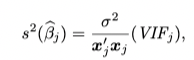


/var/folders/gk/grt4hfz969ngc_pt206514740000gn/T/ipykernel_33436/770896640.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


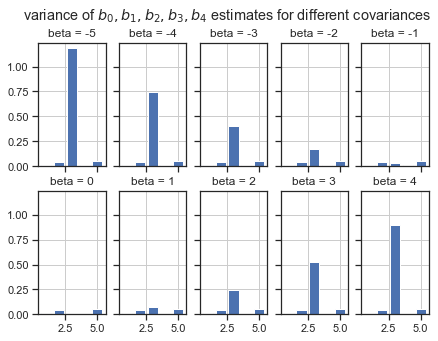

In [8]:
def create_lincomb(seed, beta2):
    test = ColinearX(N=200, beta=(0, 1, 1, 1), noise_var=1, random_seed=seed)
    test.generate_X(co_type="pairwise correlation", mean=(0, 0, 0), cov=0)
    test.add_linear_combination(i_list=[1, 2], beta=(0, 0.5, beta2), y_beta=0, noise_var=0.1)
    test.generate_y()
    test.train_test_split()
    test.fit()
    return test.b_pred

def vary_seed(param, create):
    a = create(1, param).size
    b = np.array([]).reshape(0,a)
    for i in range(5):
        b = np.concatenate((b, create(i, param).reshape(1,a)), axis=0)
    return b

def vary_beta(create):
    var_dict = {}
    for i in range(-5, 5):
        var_dict[i] = vary_seed(i, create).var(axis=0)
    return var_dict

vars = vary_beta(create_lincomb)

fig, axs = plt.subplots(2,5,sharex=True, sharey=True, figsize=(7,5))

for i, ax in enumerate(axs.flatten()): 
    ax.bar(x = np.arange(1,6), height = vars[i-5])
    ax.grid(True)
    ax.set_title(label = "beta = {:.0f}".format(i-5))

fig.suptitle("variance of $b_0, b_1, b_2, b_3, b_4$ estimates for different covariances\n")
fig.show()

### Example 2: generate features with X_1 and X_2 correlated, but not lineararly dependent

Here we build a model $\boldsymbol{y} = b_0 + b_1\boldsymbol{X}_1 + b_2\boldsymbol{X}_2 + b_3\boldsymbol{X}_3 + \boldsymbol{\epsilon}$ where $X_1$ and $X_2$ are normally distributed and have covariance of 0.8.

Can we deal with the correlation of features by removing features like we did last time, or do we have to do somthing else?

R-squared of model is 94.16%
Variance inflation factor of features are [2.80140675 2.8006571  1.00399447]


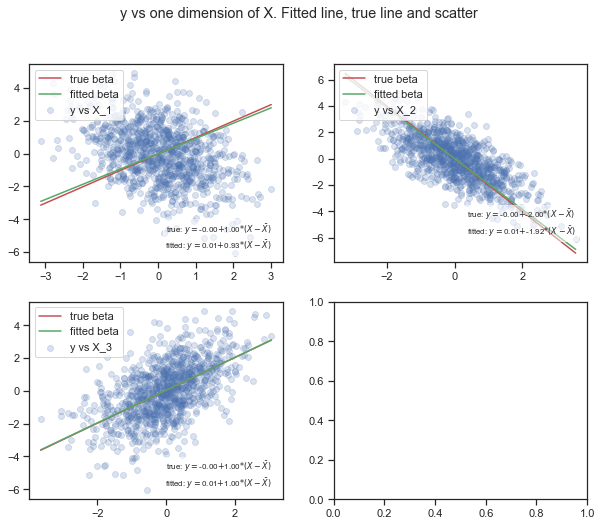

In [9]:
# create the model above
def create_colinear():
    ex2 = ColinearX(N=1000, beta=(0, 1, -2, 1), noise_var=0.2, random_seed=42)
    ex2.generate_X(co_type="pairwise correlation", mean=(0,0,0), cov=0.8)
    ex2.generate_y()
    ex2.train_test_split()
    ex2.fit()
    print("R-squared of model is {:.2%}".format(ex2.score))
    print("Variance inflation factor of features are {}".format(ex2.variance_inflation_factor(ex2.X)))
    return ex2
ex2 = create_colinear()
ex2.plot2D()

Given that we have a slightly high variance inflation factor for $X_1$ and $X_2$, we could try to remove one of the features. The variance inflation factor is almost identical for $X_1$ and $X_2$ though. Does that raise a warning flag? Lets see what happens in this case when we remove a feature. Let's remove $X_2$

R-squared of new model is 83.23%
Variance inflation factor of remaining features are [1.00027213 1.00027213]


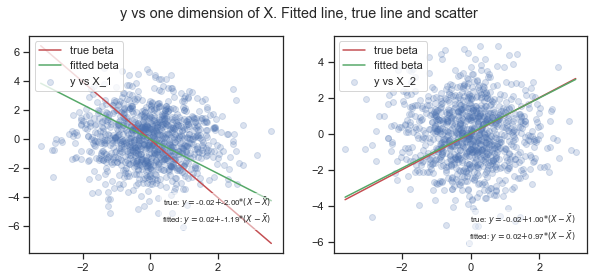

In [14]:
ex2.remove_Xi(1)
ex2.fit()
print("R-squared of new model is {:.2%}".format(ex2.score))
print("Variance inflation factor of remaining features are {}".format(ex2.variance_inflation_factor(ex2.X)))
ex2.plot2D()

Well now have lower variance inflation factors, but $R^2$ is lower and we have lost predictive power: lets reset the model and instead of removing $X_2$, replace it by the residuals of $X_2$ regressed on the other features in X.

R-squared of model is 94.16%
Variance inflation factor of features are [2.80140675 2.8006571  1.00399447]
R-squared of new model is 94.16%
Variance inflation factor of remaining features are [1.00053988 1.         1.00053988]



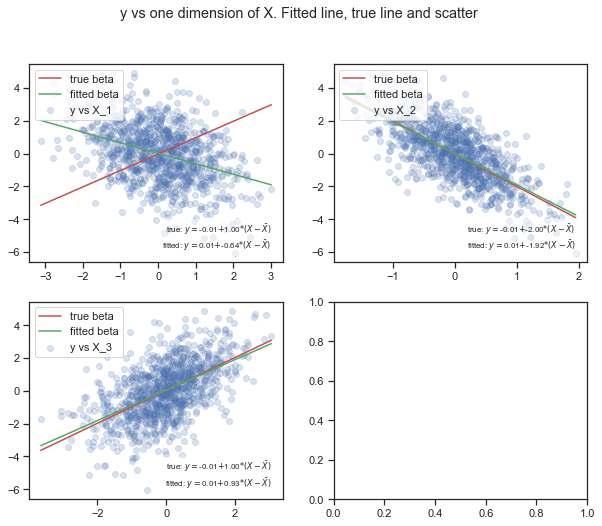

In [15]:
ex3 = create_colinear()
ex3.convert_feature_to_residuals(ex3.X, 1)
ex3.fit()
print("R-squared of new model is {:.2%}".format(ex3.score))
print("Variance inflation factor of remaining features are {}\n".format(ex3.variance_inflation_factor(ex3.X)))
ex3.plot2D()

Success! In this case it was better to keep the original number of features, but just transform one so that we don't lose any information

### Show relationship between covariance and variance inflation factor

We do similar to above. We vary the covariance between X_1 and X_2 and plot the VIFs. As expected VIF gets higher as correlation gets higher. 

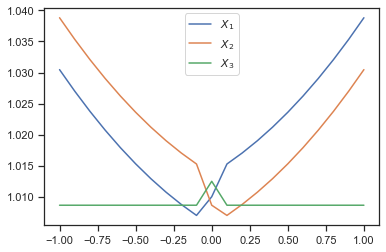

In [10]:
def create_colinear2(cov):
    ex2 = ColinearX(N=200, beta=(0, 1, 1, 1), noise_var=0.2, random_seed=42)
    ex2.generate_X(co_type="pairwise correlation", mean=(0,0,0), cov=cov)
    ex2.generate_y()
    ex2.train_test_split()
    ex2.fit()
    return ex2.variance_inflation_factor(ex2.X).reshape(1,3)

def correlation_vs_variance_factor():
    factors = np.array([]).reshape(0,3)
    for i in np.arange(-1, 1.05, 0.1):
        a = create_colinear2(cov=i/10)
        factors = np.concatenate((factors, a), axis=0)
    return np.arange(-1, 1.05, 0.1), factors
x, y = correlation_vs_variance_factor()

plt.plot(x, y, label=["$X_1$","$X_2$","$X_3$"]);
plt.legend(loc="upper center")
plt.show()

### Stability of beta estimates when there is high correlation between features

Similar to above, we generate the dataset from different random seeds, calculate regression coefficients from different covariances and look at the results. We can see high variance for very large magnitude covariance, but most of the time, estimating coeficients isn't too bad if there is a tiny bit of correlation

/var/folders/gk/grt4hfz969ngc_pt206514740000gn/T/ipykernel_32257/746193276.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


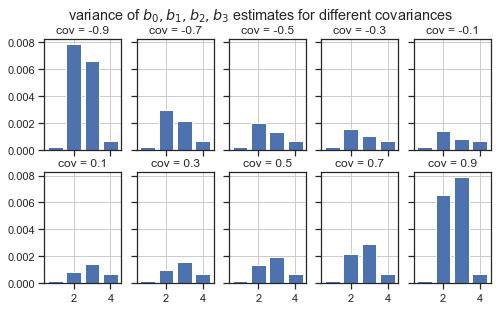

In [25]:
def create_colinear3(seed, cov):
    ex2 = ColinearX(N=200, beta=(0, 1, 1, 1), noise_var=0.2, random_seed=seed)
    ex2.generate_X(co_type="pairwise correlation", mean=(0,0,0), cov=cov)
    ex2.generate_y()
    ex2.train_test_split()
    ex2.fit()
    return ex2.b_pred

def vary_cov(create):
    var_dict = {}
    for i in range(10):
        cov = i/5 - 0.9
        var_dict[i] = vary_seed(cov, create).var(axis=0)
    return var_dict

vars = vary_cov(create_colinear3)

fig, axs = plt.subplots(2,5,sharex=True, sharey=True, figsize=(8,4.5))

for i, ax in enumerate(axs.flatten()):
    cov = i/5 - 0.9
    ax.bar(x = np.arange(1,5), height = vars[i])
    ax.grid(True)
    ax.set_title(label = "cov = {:.1f}".format(cov))

fig.suptitle("variance of $b_0, b_1, b_2, b_3$ estimates for different covariances\n")
fig.show()


The larger variance of beta esimates as features are more correlated is really nicely illustrated in Rawlings, Pantula, Dickey, 1998, "Applied Regression Analysis":

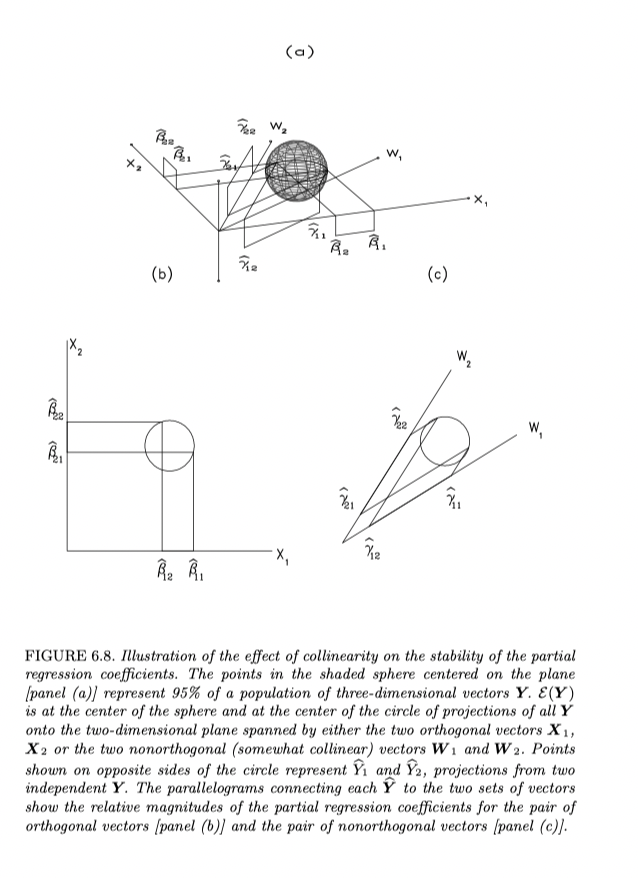

## Annex - examples of other exploration and functionality in the colinearity code

First run a regression for $\boldsymbol{X}$ consisting of 4 independent random variables, with two being uniform $[0,1]$ and two being normal with means 0.5 and -1 and variance 1. $\boldsymbol{\beta}=(1,4,1,1,1)$

R^2 = 0.850


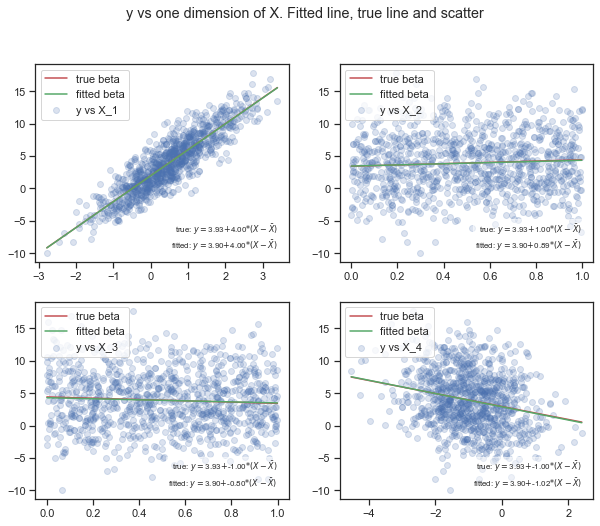

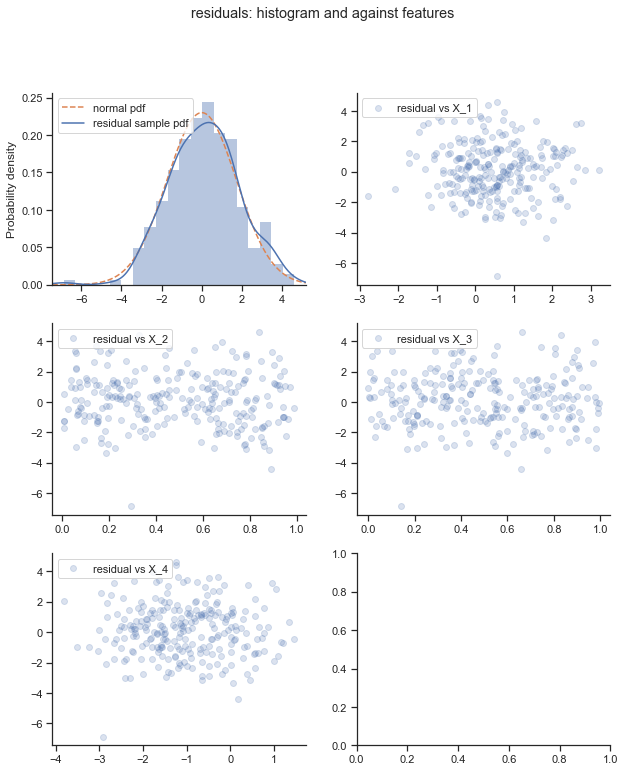

In [106]:
reg = ColinearX(N=1000, beta=(1,4,1,-1,-1), noise_var=3)
reg.generate_X(co_type='pairwise correlation',mean=(0.5,0,0,-1),
   cov=0)
reg.to_uniform(i_list=[2,3])
reg.generate_y()
reg.train_test_split()
reg.fit()
print('R^2 = {:.3f}'.format(reg.score))
reg.plot2D()
reg.plot_residuals()

Now modify the data parameters slightly so that X_0 and X_1 have coveriance of 0.8

R^2 = 0.859


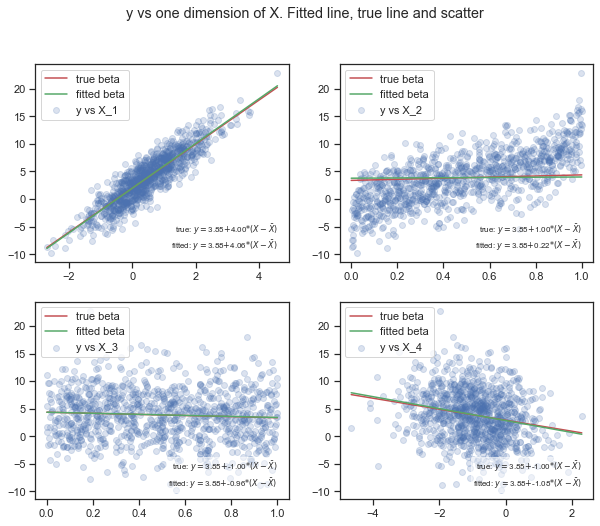

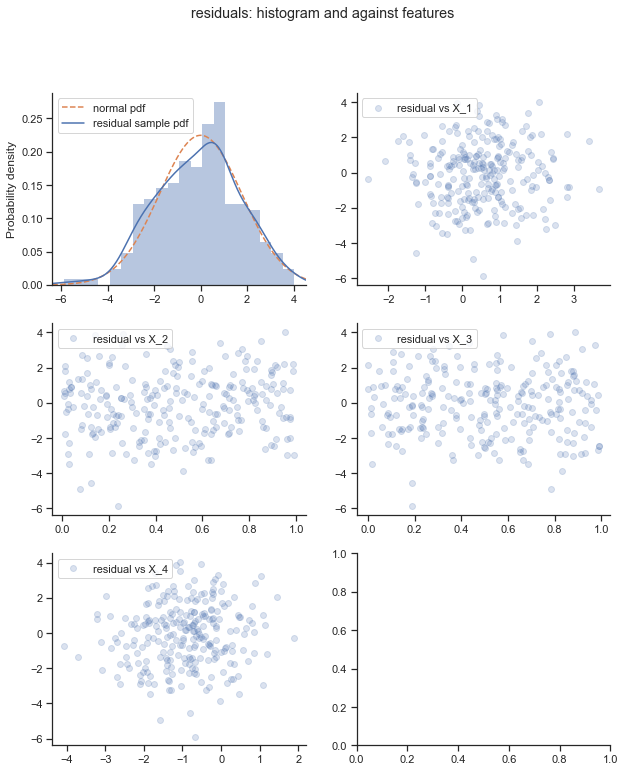

In [107]:
reg = ColinearX(N=1000, beta=(1,4,1,-1,-1), noise_var=3)
reg.generate_X(co_type='pairwise correlation',mean=(0.5,0,0,-1),
   cov=0.8)
reg.to_uniform(i_list=[2,3])
reg.generate_y()
reg.train_test_split()
reg.fit()
print('R^2 = {:.3f}'.format(reg.score))
reg.plot2D()
reg.plot_residuals()

$X_2$ looks like a poor fit and it also looks suspiciously like $X_1$. Let's try removing $X_2$ and seeing how the model does:

R^2 = 0.858


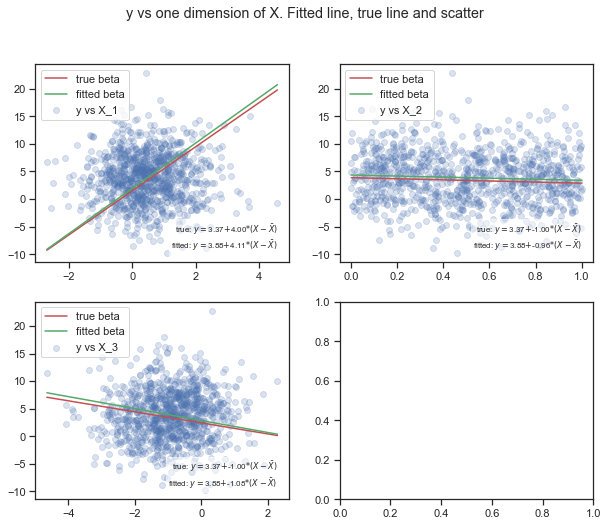

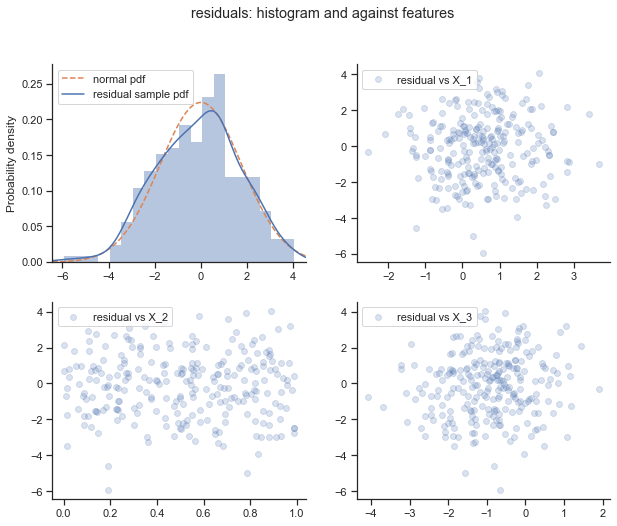

In [108]:
reg.remove_Xi(2)
reg.fit()
print('R^2 = {:.3f}'.format(reg.score))
reg.plot2D()
reg.plot_residuals()

Well we didn't need $X_1$ but the overal fit of the model hasn't changed.